### Visualizations for tasks

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
base_dir = "/Users/madsandersen/Desktop/bi-challenge/CABIChallenge/VisualizationCSVs"

### Question 1

In [32]:
file_name = "Question1_sub1_Vizual.csv"
df = pd.read_csv(f"{base_dir}/{file_name}")
df['time_to_close'] = pd.to_timedelta(df['time_to_close'])/pd.Timedelta(days=1)

In [33]:
df.head()

,case_id,time_to_close
0,1002,4.598555
1,1006,14.453327
2,1008,63.420537
3,1012,60.888494
4,1016,70.400972


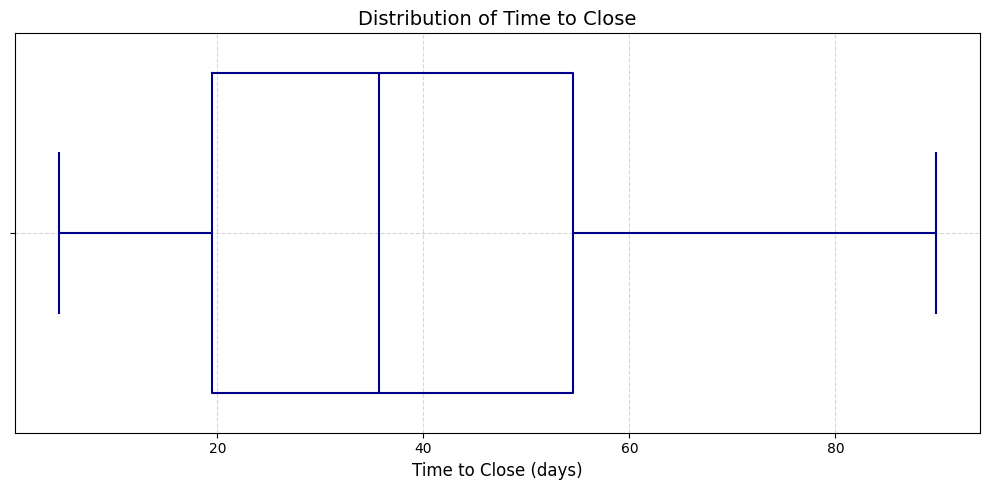

<Figure size 640x480 with 0 Axes>

In [34]:
fig, ax = plt.subplots(figsize=(10, 5))

sns.boxplot(
    x='time_to_close',
    data=df,
    color='darkblue',
    ax=ax,
    orient='h',
    fill = False
)

# Add labels and title
ax.set_xlabel("Time to Close (days)", fontsize=12)
ax.set_title("Distribution of Time to Close", fontsize=14)
ax.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

plt.savefig("CloseTimeDist.png")


### Sub Question 2

In [35]:
file_name = "Question1_sub2_vizual.csv"
df = pd.read_csv(f"{base_dir}/{file_name}")

In [36]:
df.head()

,market,max
0,Belgium,4200
1,France,3400
2,Germany,2900
3,Italy,2600
4,Netherlands,3600


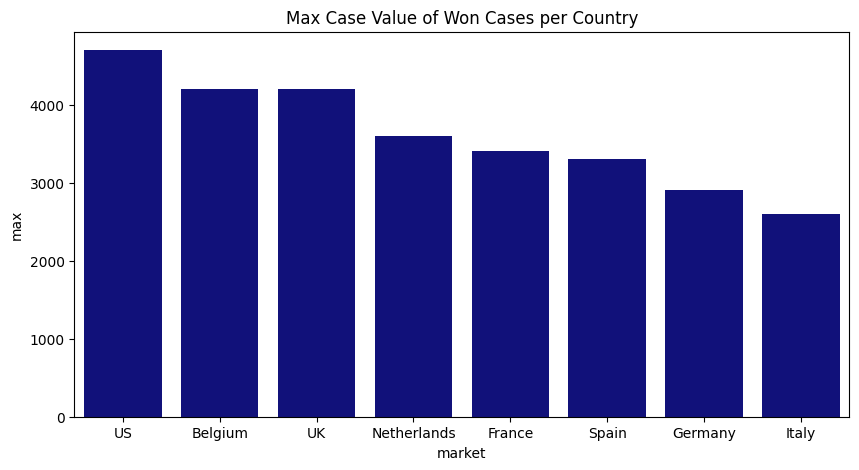

In [37]:
fig, ax = plt.subplots(1,figsize = (10,5))

df = df.sort_values(by = 'max', ascending = False)
sns.barplot(df, 
            x = 'market',
            y = 'max',
            color = 'darkblue'
           )

plt.title("Max Case Value of Won Cases per Country")
plt.savefig("MaxCaseVal.png")